In [12]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


from sklearn.datasets import load_digits
from sklearn import datasets, model_selection
from sklearn.datasets import fetch_openml

import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

In [13]:
# load MNIST 
mnist = fetch_openml('mnist_784', version=1, data_home='./data')

# check the form of data
print(mnist.keys())

# check the actual data
mnist

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [14]:
# generalizing exlanational variable(0-255 -> 0-1)
mnist_data = mnist.data/255

# change datas to dataframe object
pd.DataFrame(mnist_data)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


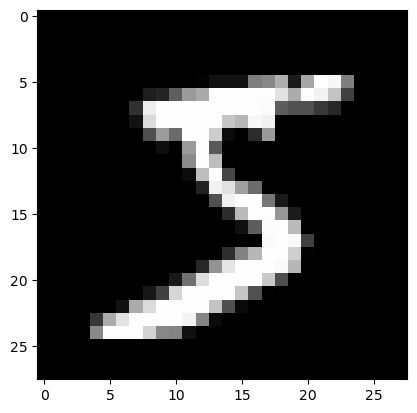

In [15]:
# check the 1st image
plt.imshow(mnist.data.iloc[0].values.reshape(28, 28), cmap=plt.cm.gray)
plt.show()



In [16]:
# allocating target to variance 
mnist_label = mnist.target
mnist_label

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [17]:
# total train data 
train_size = 5000
# total test data
test_size = 500

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(
    mnist_data, mnist_label, train_size=train_size, test_size = test_size)

In [18]:
# Transform data to NumPy array first
train_X = torch.from_numpy(train_X.to_numpy().copy()).float()  # DataFrame -> NumPy array using '.to_numpy()' -> Writable copy -> Tensor
train_Y = torch.from_numpy(train_Y.cat.codes.to_numpy().copy()).long()  # Categorical -> NumPy array -> Writable copy -> Tensor

test_X = torch.from_numpy(test_X.to_numpy().copy()).float()
test_Y = torch.from_numpy(test_Y.cat.codes.to_numpy().copy()).long()  # 동일한 변환 적용

# Check the tensor shape
print(train_X.shape)
print(train_Y.shape)


torch.Size([5000, 784])
torch.Size([5000])


In [19]:
# combine tensor 
train = TensorDataset(train_X, train_Y)

# check the 1st data
print(train[0])

# split to mini batch
train_loader = DataLoader(train, batch_size = 100, shuffle = True)


(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000,

In [20]:
# nn
class Net(nn.Module):  # This makes a new class called 'Net'. It uses 'nn.Module' to help build a neural network.
    def __init__(self):  # This is the setup function. It runs when you make a new 'Net'.
        super(Net, self).__init__()  # This runs the setup for 'nn.Module' too, so everything works properly.
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.dropout(x, training=self.training)
        x = self.fc6(x)
        return F.log_softmax(x, dim=1)


# create a instance
model = Net()


In [21]:
# Specify the device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Use GPU if available, otherwise CPU

# Loss function object
criterion = nn.CrossEntropyLoss()  

# Optimization object
optimizer = optim.SGD(model.parameters(), lr=0.01) 

# Start training
for epoch in range(1000):  # Training for 1000 epochs
    total_loss = 0
    for train_x, train_y in train_loader:  # Loop through the training data
        train_x, train_y = train_x.to(device), train_y.to(device)  
        optimizer.zero_grad() 
        output = model(train_x)  # Forward pass
        loss = criterion(output, train_y)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update model parameters
        total_loss += loss.item()  # Fixed: Use '.item()' to access the scalar loss value
    if (epoch + 1) % 100 == 0:  # Print every 100 epochs
        print(f"Epoch {epoch + 1}, Total Loss: {total_loss}")


Epoch 100, Total Loss: 28.146047711372375
Epoch 200, Total Loss: 2.4633450265973806
Epoch 300, Total Loss: 0.4091827648226172
Epoch 400, Total Loss: 0.17724574566818774
Epoch 500, Total Loss: 0.1519301984226331
Epoch 600, Total Loss: 0.09345780615694821
Epoch 700, Total Loss: 0.08560923932236619
Epoch 800, Total Loss: 0.06173021825088654
Epoch 900, Total Loss: 0.052131533906504046
Epoch 1000, Total Loss: 0.04396782602270832


In [25]:

# Move data to the device (GPU or CPU)
test_x, test_y = train_x.to(device), train_y.to(device)

# Predict the class (0 or 1) for each sample
result = torch.max(test_x, 1)[1]  # Fix: Corrected the parentheses and [1]

# Measure model's accuracy
accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())

# Print the accuracy
print(accuracy)


0.0
